# Project #1 - Global Food Prices in Lebanon

## Introduction

Global food price fluctuations can cause famine and large population shifts. Price changes are increasingly critical to policymakers.

For this analysis, we will focus on food prices data from **Lebanon**. We try to find some micro and macro trends in the food prices from 2016 through 2021. It is an arab country from the Middle East that is stroke by a violent inflation since 2020 due to decades of systemic corruption in public administrations, poor leadership and regional geopolitical instability.

The data we have chosen to work with come from the **World Food Program** which is an NGO related to the UN that works for delivering food assistance in emergencies and working with communities to improve nutrition and build resilience.

The steps we will follow in this analysis is the following:

- **Step 1:** Importing the Python libraries and dataset that we will use in the analysis.

- **Step 2:** Summarize the data to see what is included; cleaning and preparing data for exploratory data analysis

- **Step 3:** Getting descriptive and summary statistics to see the distribution of the data; Visualizing data using Matplotlib and Seaborn libraries

- **Step 4:** Inferences about food price trends in Lebanon based on the findings

- **Step 5:** Conclusion and summary of findings

#### Research Question:  What are the important trends on food prices across the different regions of Lebanon and what is the most impacted commodity in these last years ?

## Step 1: Importing the libraries and the dataset

We will use Python libraries for data analysis such as numpy and pandas: and for data visualization such as matplotlib and seaborn. The dataset will be imported from Github repository, since we had uploaded it there before.

%matplotlib notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'https://raw.githubusercontent.com/mkey2508/DAV-5400/main/wfpvam_foodprices.csv'
lebanon = pd.read_csv(filename, sep=';')

## Step 2: Data Summary

**The data set comes from the Global Food Prices database from the WFP: https://data.humdata.org/dataset/wfp-food-prices.**

The file contains data for more than 100 countries but we decided to focus on only one for a more in-depth analysis of this specific use case. The reason for choosing Lebanon is that there has recently been a significant price movements for foods.

In [3]:
# having a general idea about the data

lebanon.info() #We check all the data types of each column of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31309 entries, 0 to 31308
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adm0_id             31309 non-null  float64
 1   adm0_name           31309 non-null  object 
 2   adm1_id             31309 non-null  int64  
 3   adm1_name           0 non-null      float64
 4   mkt_id              31309 non-null  int64  
 5   mkt_name            31309 non-null  object 
 6   cm_id               31309 non-null  int64  
 7   cm_name             31309 non-null  object 
 8   cur_id              31309 non-null  float64
 9   cur_name            31309 non-null  object 
 10  pt_id               31309 non-null  int64  
 11  pt_name             31309 non-null  object 
 12  um_id               31309 non-null  int64  
 13  um_name             31309 non-null  object 
 14  mp_month            31309 non-null  int64  
 15  mp_year             31309 non-null  int64  
 16  mp_p

There are 31309 rows and 18 attributes in the dataset. There are sufficient categorical and numerical values for analysis.

In [4]:
# first look into the data

lebanon.head() #We look at the first 5 rows of the data set

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,141.0,Lebanon,1797,NaN,1687,Baalbeck,58,Wheat flour,0.0,LBP,15,Retail,5,KG,1,2016,838.1666,NaN
1,141.0,Lebanon,1797,NaN,1687,Baalbeck,58,Wheat flour,0.0,LBP,15,Retail,5,KG,2,2016,1018.7500,NaN
2,141.0,Lebanon,1797,NaN,1687,Baalbeck,58,Wheat flour,0.0,LBP,15,Retail,5,KG,3,2016,980.0000,NaN
3,141.0,Lebanon,1797,NaN,1687,Baalbeck,58,Wheat flour,0.0,LBP,15,Retail,5,KG,4,2016,961.0000,NaN
4,141.0,Lebanon,1797,NaN,1687,Baalbeck,58,Wheat flour,0.0,LBP,15,Retail,5,KG,5,2016,950.0000,NaN


The data set is made of many fields with both categorical data and numerical data. It contains price levels for different commodities in different regions of Lebanon recorded at different moments in time.

In [5]:
lebanon['adm1_name'].unique() #This column looked empty, we verify it before dropping it

array([nan])

In [6]:
lebanon = lebanon.drop(columns=['adm0_id', 'adm0_name','adm1_id', 'adm1_name', 'mkt_id','cm_id','cur_id','pt_id','um_id', 'mp_commoditysource', 'cur_name'])

We dropped columns that will not be useful for the analysis:
- IDs of columns
- Empty column adm1_name
- The country column because there will be only one for the analysis
- The column for the currency because there will be only one, the Lebanese Pound (LBP)

After dropping some of the values that are not our interest for the analysis, we will now rename columns for a better readability of our data.

In [7]:
# renaming the attributes using rename method

lebanon = lebanon.rename(columns={'mkt_name' : 'city', 'cm_name' : 'commodity', 'pt_name' : 'pt', 'um_name' : 'quantity', 'mp_month' : 'month', 'mp_year' : 'year', 'mp_price' : 'price'})
lebanon

,city,commodity,pt,quantity,month,year,price
0,Baalbeck,Wheat flour,Retail,KG,1,2016,838.1666
1,Baalbeck,Wheat flour,Retail,KG,2,2016,1018.7500
2,Baalbeck,Wheat flour,Retail,KG,3,2016,980.0000
3,Baalbeck,Wheat flour,Retail,KG,4,2016,961.0000
4,Baalbeck,Wheat flour,Retail,KG,5,2016,950.0000
...,...,...,...,...,...,...,...
31304,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",Retail,20 L,1,2021,28600.0000
31305,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",Retail,20 L,2,2021,32200.0000
31306,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",Retail,20 L,3,2021,39700.0000
31307,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",Retail,20 L,4,2021,39800.0000


Cleaning if there is any missing value, which can make the data skewed. We will use isnull() method

In [8]:
lebanon.isnull().sum() #We look for any null value in the dataset

city         0
commodity    0
pt           0
quantity     0
month        0
year         0
price        0
dtype: int64

The data set contains no null value so far.

We also look at all the existing values using unique() function for each **categorical data column**, to control the coherence:

In [9]:
lebanon.nunique()

city           26
commodity      28
pt              1
quantity       12
month          12
year            6
price        9433
dtype: int64

In [10]:
# unique cities

lebanon['city'].unique()

array(['Baalbeck', 'Hermel', 'Rashaya', 'West Beqaa', 'Zahle', 'Beirut',
       'Akkar', 'Batroun', 'Bechare', 'Koura', 'Minieh-Dannieh',
       'Tripoli', 'Zgharta', 'Jezzine', 'Saida', 'Sour', 'Aley', 'Baabda',
       'Chouf', 'El Metn', 'Jbeil', 'Keserwan', 'Bint Jbeil', 'Hasbaya',
       'Marjayoun', 'Nabatiyeh'], dtype=object)

In [11]:
# unique foods

lebanon['commodity'].unique()

array(['Wheat flour', 'Beans (white)', 'Eggs', 'Cabbage',
       'Oil (sunflower)', 'Salt', 'Cucumbers (greenhouse)',
       'Milk (powder)', 'Chickpeas', 'Fuel (diesel)',
       'Rice (imported, Egyptian)', 'Tomatoes (paste)', 'Lettuce',
       'Cheese (picon)', 'Meat (beef, canned)', 'Fish (sardine, canned)',
       'Fish (tuna, canned)', 'Fuel (gas)', 'Sugar (white)',
       'Bread (pita)', 'Spinach', 'Bulgur (brown)',
       'Meat (chicken, whole, frozen)', 'Lentils (green)',
       'Lentils (red)', 'Pasta (spaghetti)', 'Lentils (brown)',
       'Fuel (petrol-gasoline, 95 octane)'], dtype=object)

In [12]:
lebanon['pt'].unique()

array(['Retail'], dtype=object)

We decide to also drop the column 'pt' as it only has one useless value which is 'Retail':

In [13]:
lebanon = lebanon.drop(columns=['pt'])
lebanon

,city,commodity,quantity,month,year,price
0,Baalbeck,Wheat flour,KG,1,2016,838.1666
1,Baalbeck,Wheat flour,KG,2,2016,1018.7500
2,Baalbeck,Wheat flour,KG,3,2016,980.0000
3,Baalbeck,Wheat flour,KG,4,2016,961.0000
4,Baalbeck,Wheat flour,KG,5,2016,950.0000
...,...,...,...,...,...,...
31304,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",20 L,1,2021,28600.0000
31305,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",20 L,2,2021,32200.0000
31306,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",20 L,3,2021,39700.0000
31307,Nabatiyeh,"Fuel (petrol-gasoline, 95 octane)",20 L,4,2021,39800.0000


In [14]:
# which years are covered

lebanon['year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [15]:
# are all the months included

lebanon['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

We also round prices for a more readable dataset using round() function:

In [16]:
lebanon['price'].round(0)

0          838.0
1         1019.0
2          980.0
3          961.0
4          950.0
          ...   
31304    28600.0
31305    32200.0
31306    39700.0
31307    39800.0
31308    40900.0
Name: price, Length: 31309, dtype: float64

How many different commodity exists in the data

In [17]:
# commodities

lebanon.commodity.unique()

array(['Wheat flour', 'Beans (white)', 'Eggs', 'Cabbage',
       'Oil (sunflower)', 'Salt', 'Cucumbers (greenhouse)',
       'Milk (powder)', 'Chickpeas', 'Fuel (diesel)',
       'Rice (imported, Egyptian)', 'Tomatoes (paste)', 'Lettuce',
       'Cheese (picon)', 'Meat (beef, canned)', 'Fish (sardine, canned)',
       'Fish (tuna, canned)', 'Fuel (gas)', 'Sugar (white)',
       'Bread (pita)', 'Spinach', 'Bulgur (brown)',
       'Meat (chicken, whole, frozen)', 'Lentils (green)',
       'Lentils (red)', 'Pasta (spaghetti)', 'Lentils (brown)',
       'Fuel (petrol-gasoline, 95 octane)'], dtype=object)

We will also create another dataframe which only includes the commodities that are used for analysis. We first copy the original dataset to keep it, then get the commodity values using pandas conditional selection. We have chosen the most basic commodities, since we think they represent the food prices better. By this way, we can make safer generalizations about food prices in Lebanon. The commodities we have selected are the following:

- Fuel (diesel)
- Bread
- Fish (tuna)
- Oil (sunflower)
- Eggs
- Meat (beef, canned)
- Sugar (white)
- Salt

In [18]:
# creating a new dataframe containing the commodities of the analysis

lebanon_selected = lebanon.copy()
lebanon_selected = lebanon_selected[(lebanon['commodity'] == 'Fuel (diesel)') | (lebanon['commodity'] == 'Bread (pita)') | (lebanon['commodity'] == 'Oil (sunflower)') | 
                           (lebanon['commodity'] == 'Fish (tuna, canned)') | (lebanon['commodity'] == 'Eggs') | (lebanon['commodity'] == 'Meat (beef, canned)') |
                           (lebanon['commodity'] == 'Sugar (white)') | (lebanon['commodity'] == 'Salt')]

In [19]:
# checking if the code works

lebanon_selected

,city,commodity,quantity,month,year,price
130,Baalbeck,Eggs,30 pcs,1,2016,2103.1746
131,Baalbeck,Eggs,30 pcs,2,2016,1996.5278
132,Baalbeck,Eggs,30 pcs,3,2016,1818.1818
133,Baalbeck,Eggs,30 pcs,4,2016,3045.4546
134,Baalbeck,Eggs,30 pcs,5,2016,3041.6667
...,...,...,...,...,...,...
30952,Nabatiyeh,Bread (pita),KG,1,2021,2156.7478
30953,Nabatiyeh,Bread (pita),KG,2,2021,2500.0000
30954,Nabatiyeh,Bread (pita),KG,3,2021,2592.9936
30955,Nabatiyeh,Bread (pita),KG,4,2021,2445.5307


## Step 3: Exploratory Data Analysis

We are now going to perform an exploratory data analysis on the most basic commodities corresponding to an average basket of goods. We begin with getting how many counts of data for each commodity using value_counts() method.

In [20]:
# the number of entry for each commodity

lebanon['commodity'].value_counts()

Meat (beef, canned)                  1489
Bulgur (brown)                       1487
Cheese (picon)                       1480
Milk (powder)                        1479
Wheat flour                          1474
Rice (imported, Egyptian)            1466
Beans (white)                        1458
Pasta (spaghetti)                    1451
Sugar (white)                        1446
Salt                                 1402
Eggs                                 1389
Bread (pita)                         1379
Chickpeas                            1360
Fuel (petrol-gasoline, 95 octane)    1307
Fuel (diesel)                        1307
Fuel (gas)                           1304
Fish (tuna, canned)                  1257
Lentils (red)                        1241
Lentils (green)                      1239
Tomatoes (paste)                     1174
Oil (sunflower)                       930
Lentils (brown)                       668
Cucumbers (greenhouse)                606
Meat (chicken, whole, frozen)     

The number of entries for the selected commodities ranges between 930 to 1489, which is representative of the price changes

The conduct the analysis efficiently, we will create new variables for each selected commodity using selection

In [21]:
# fuel variable

fuel = lebanon[lebanon['commodity'] == 'Fuel (diesel)']
fuel

,city,commodity,quantity,month,year,price
573,Baalbeck,Fuel (diesel),20 L,1,2017,15000.0
574,Baalbeck,Fuel (diesel),20 L,2,2017,15200.0
575,Baalbeck,Fuel (diesel),20 L,3,2017,15300.0
576,Baalbeck,Fuel (diesel),20 L,4,2017,14700.0
577,Baalbeck,Fuel (diesel),20 L,5,2017,14700.0
...,...,...,...,...,...,...
30458,Nabatiyeh,Fuel (diesel),20 L,1,2021,20000.0
30459,Nabatiyeh,Fuel (diesel),20 L,2,2021,22300.0
30460,Nabatiyeh,Fuel (diesel),20 L,3,2021,28000.0
30461,Nabatiyeh,Fuel (diesel),20 L,4,2021,26100.0


In [22]:
# bread variable

bread = lebanon[lebanon['commodity'] == 'Bread (pita)']
bread

,city,commodity,quantity,month,year,price
1084,Baalbeck,Bread (pita),KG,1,2016,1315.7895
1085,Baalbeck,Bread (pita),KG,2,2016,1348.6842
1086,Baalbeck,Bread (pita),KG,3,2016,1459.3301
1087,Baalbeck,Bread (pita),KG,4,2016,1389.2823
1088,Baalbeck,Bread (pita),KG,5,2016,1496.4495
...,...,...,...,...,...,...
30952,Nabatiyeh,Bread (pita),KG,1,2021,2156.7478
30953,Nabatiyeh,Bread (pita),KG,2,2021,2500.0000
30954,Nabatiyeh,Bread (pita),KG,3,2021,2592.9936
30955,Nabatiyeh,Bread (pita),KG,4,2021,2445.5307


In [23]:
# sunflower oil

oil_s = lebanon[lebanon['commodity'] == 'Oil (sunflower)']
oil_s

,city,commodity,quantity,month,year,price
259,Baalbeck,Oil (sunflower),5 L,1,2016,9014.2857
260,Baalbeck,Oil (sunflower),5 L,2,2016,9437.5000
261,Baalbeck,Oil (sunflower),5 L,3,2016,9869.0909
262,Baalbeck,Oil (sunflower),5 L,4,2016,9300.9091
263,Baalbeck,Oil (sunflower),5 L,1,2017,10240.0000
...,...,...,...,...,...,...
30216,Nabatiyeh,Oil (sunflower),5 L,1,2021,69491.4666
30217,Nabatiyeh,Oil (sunflower),5 L,2,2021,72800.6369
30218,Nabatiyeh,Oil (sunflower),5 L,3,2021,85447.9972
30219,Nabatiyeh,Oil (sunflower),5 L,4,2021,116347.5138


In [24]:
# canned tuna fish

fish = lebanon[lebanon['commodity'] == 'Fish (tuna, canned)']
fish

,city,commodity,quantity,month,year,price
904,Baalbeck,"Fish (tuna, canned)",185 G,1,2016,1737.1429
905,Baalbeck,"Fish (tuna, canned)",185 G,2,2016,1562.5000
906,Baalbeck,"Fish (tuna, canned)",185 G,3,2016,1731.3636
907,Baalbeck,"Fish (tuna, canned)",185 G,4,2016,1886.3637
908,Baalbeck,"Fish (tuna, canned)",185 G,5,2016,1852.8646
...,...,...,...,...,...,...
30775,Nabatiyeh,"Fish (tuna, canned)",185 G,1,2021,6657.2452
30776,Nabatiyeh,"Fish (tuna, canned)",185 G,2,2021,8355.7794
30777,Nabatiyeh,"Fish (tuna, canned)",185 G,3,2021,7008.5818
30778,Nabatiyeh,"Fish (tuna, canned)",185 G,4,2021,7196.1406


In [25]:
# Egg

egg = lebanon[lebanon['commodity'] == 'Eggs']
egg

,city,commodity,quantity,month,year,price
130,Baalbeck,Eggs,30 pcs,1,2016,2103.1746
131,Baalbeck,Eggs,30 pcs,2,2016,1996.5278
132,Baalbeck,Eggs,30 pcs,3,2016,1818.1818
133,Baalbeck,Eggs,30 pcs,4,2016,3045.4546
134,Baalbeck,Eggs,30 pcs,5,2016,3041.6667
...,...,...,...,...,...,...
30157,Nabatiyeh,Eggs,30 pcs,1,2021,16861.0587
30158,Nabatiyeh,Eggs,30 pcs,2,2021,18370.1833
30159,Nabatiyeh,Eggs,30 pcs,3,2021,23175.5551
30160,Nabatiyeh,Eggs,30 pcs,4,2021,24044.2073


In [26]:
# Beef

meat_b = lebanon[lebanon['commodity'] == 'Meat (beef, canned)']
meat_b

,city,commodity,quantity,month,year,price
827,Baalbeck,"Meat (beef, canned)",200 G,1,2016,1835.0000
828,Baalbeck,"Meat (beef, canned)",200 G,2,2016,1906.2500
829,Baalbeck,"Meat (beef, canned)",200 G,3,2016,1709.5455
830,Baalbeck,"Meat (beef, canned)",200 G,4,2016,1800.0000
831,Baalbeck,"Meat (beef, canned)",200 G,5,2016,1641.6666
...,...,...,...,...,...,...
30704,Nabatiyeh,"Meat (beef, canned)",200 G,1,2021,5550.3789
30705,Nabatiyeh,"Meat (beef, canned)",200 G,2,2021,5601.7328
30706,Nabatiyeh,"Meat (beef, canned)",200 G,3,2021,6295.1187
30707,Nabatiyeh,"Meat (beef, canned)",200 G,4,2021,7875.8225


In [27]:
# Sugar

sugar = lebanon[lebanon['commodity'] == 'Sugar (white)']
sugar

,city,commodity,quantity,month,year,price
1019,Baalbeck,Sugar (white),KG,1,2016,928.4286
1020,Baalbeck,Sugar (white),KG,2,2016,943.7500
1021,Baalbeck,Sugar (white),KG,3,2016,931.8182
1022,Baalbeck,Sugar (white),KG,4,2016,927.1818
1023,Baalbeck,Sugar (white),KG,5,2016,954.0833
...,...,...,...,...,...,...
30890,Nabatiyeh,Sugar (white),KG,1,2021,4152.5662
30891,Nabatiyeh,Sugar (white),KG,2,2021,4297.9446
30892,Nabatiyeh,Sugar (white),KG,3,2021,5170.0793
30893,Nabatiyeh,Sugar (white),KG,4,2021,34656.5339


In [28]:
# Salt

salt = lebanon[lebanon['commodity'] == 'Salt']
salt

,city,commodity,quantity,month,year,price
316,Baalbeck,Salt,KG,1,2016,482.1429
317,Baalbeck,Salt,KG,2,2016,490.6250
318,Baalbeck,Salt,KG,3,2016,443.1818
319,Baalbeck,Salt,KG,4,2016,538.9091
320,Baalbeck,Salt,KG,5,2016,485.4167
...,...,...,...,...,...,...
30277,Nabatiyeh,Salt,KG,12,2020,2269.0000
30278,Nabatiyeh,Salt,KG,1,2021,1500.0000
30279,Nabatiyeh,Salt,KG,3,2021,4616.6667
30280,Nabatiyeh,Salt,KG,4,2021,5000.0000


Since there are differing number of entries for different commodities, we can have difficulty when visualizing and correlating in between them. In such cases, we will create new variables.

Now, after we set the ground for analysis preparing the data, we will proceed to statistical analysis.

### Summary Statistics for each variable that are used for analysis

In [29]:
# summary statistics for fuel

fuel.describe()

,month,year,price
count,1307.000000,1307.000000,1307.000000
mean,6.120122,2018.800306,17506.732976
std,3.497334,1.280936,3623.658938
min,1.000000,2017.000000,9000.000000
25%,3.000000,2018.000000,15300.000000
50%,6.000000,2019.000000,17500.000000
75%,9.000000,2020.000000,19000.000000
max,12.000000,2021.000000,28600.000000


Fuel price ranges from 9000 LBP to 28600 LBP. Standard deviation is relatively low, thus we expect to have a more stable graph for fuel. The maximum value is triple of the minimum value.

In [30]:
# summary statistics for bread

bread.describe()

,month,year,price
count,1379.000000,1379.000000,1379.000000
mean,6.153009,2018.301668,1604.501226
std,3.477140,1.520185,311.673105
min,1.000000,2016.000000,789.473700
25%,3.000000,2017.000000,1458.000000
50%,6.000000,2018.000000,1500.000000
75%,9.000000,2020.000000,1526.315800
max,12.000000,2021.000000,2750.000100


Bread price ranges from 789 LBP to 27500 LBP. Standard deviation is relatively low, thus we expect to have a more stable graph for bread. The maximum value is approximately four times higher than the minimum.

In [31]:
# summary statistics for sunflower oil

oil_s.describe()

,month,year,price
count,930.000000,930.000000,930.000000
mean,5.849462,2018.722581,24933.909652
std,3.507784,1.508650,26785.173568
min,1.000000,2016.000000,3250.000000
25%,3.000000,2017.000000,10493.000000
50%,5.000000,2019.000000,11000.000000
75%,9.000000,2020.000000,26965.000000
max,12.000000,2021.000000,139093.837200


Sunflower oil price ranges from 3250 LBP to 139093 LBP. Standard deviation is very high, even higher than mean value. We do not expect to have a more stable graph for sunflower oil. The maximum value is five times higher than the minimum value.

In [32]:
# summary statistics for egg

egg.describe()

,month,year,price
count,1389.000000,1389.000000,1389.000000
mean,6.202304,2018.336213,7986.076402
std,3.483819,1.544253,5897.771427
min,1.000000,2016.000000,500.000000
25%,3.000000,2017.000000,4904.000000
50%,6.000000,2018.000000,5625.000000
75%,9.000000,2020.000000,7146.000000
max,12.000000,2021.000000,28900.000000


Egg price ranges from 500 LBP to 28900 LBP. Standard deviation is relatively high, thus we expect to have a more unstable graph for the egg. The maximum value is 50 times higher than the minimum value.

In [33]:
# summary statistics for fish

fish.describe()

,month,year,price
count,1257.000000,1257.000000,1257.000000
mean,6.178998,2018.298329,3519.045277
std,3.490744,1.572334,1874.580561
min,1.000000,2016.000000,1000.000000
25%,3.000000,2017.000000,2500.000000
50%,6.000000,2018.000000,2708.000000
75%,9.000000,2020.000000,3750.000000
max,12.000000,2021.000000,28124.995000


Fish price ranges from 1000 LBP to 28124 LBP. Standard deviation is relatively high, half of the mean value. We expect to have a more dynamic graph for the fish. The maximum value is 28 time higher than the minimum value.

In [34]:
# summary statistics for beef

meat_b.describe()

,month,year,price
count,1489.000000,1489.000000,1489.000000
mean,6.203492,2018.350571,2728.050992
std,3.493402,1.515379,1773.905955
min,1.000000,2016.000000,1000.000000
25%,3.000000,2017.000000,1813.000000
50%,6.000000,2018.000000,1917.000000
75%,9.000000,2020.000000,2452.000000
max,12.000000,2021.000000,12291.363600


Beef (meat) price ranges from 1000 LBP to 12291 LBP. Standard deviation is relatively high, however, the first three quartiles are close to each other. This means that we have many outliers. We can expect to have a relatively stable graph for the beef. The maximum value is 5 times higher than the minimum value.

In [35]:
# summary statistics for sugar

sugar.describe()

,month,year,price
count,1446.000000,1446.000000,1446.000000
mean,6.208160,2018.356846,2345.140996
std,3.483857,1.521215,4345.746983
min,1.000000,2016.000000,749.333400
25%,3.000000,2017.000000,1140.000000
50%,6.000000,2018.000000,1301.000000
75%,9.000000,2020.000000,1755.250000
max,12.000000,2021.000000,49312.500000


Sugar price ranges from 750 LBP to 49000 LBP. Standard deviation is very high, almost double of the mean value. However, the first three quartiles are quite close to each other. This means that we have many outliers. The maximum value is 6 times higher than the minimum. We can expect a more dynamic graph.

In [36]:
# summary statistics for salt

salt.describe()

,month,year,price
count,1402.000000,1402.000000,1402.000000
mean,6.282454,2018.323823,894.825077
std,3.479536,1.494454,721.184344
min,1.000000,2016.000000,250.000000
25%,3.000000,2017.000000,500.000000
50%,6.000000,2018.000000,626.500000
75%,9.000000,2020.000000,1074.500000
max,12.000000,2021.000000,10000.000000


Salt price ranges from 900 LBP to 10000 LBP. Standard deviation is very high, very close to the mean value. However, the first three quartiles are close to each other. This means that we have many outliers. The maximum value is 10 times higher than the minimum. We can expect a more dynamic graph.

In general, summary statistics tell us we have very unstable food prices in Lebanon. Differences between minimum and maximum values are generally high, standard deviations are generally high. However, the first three quartiles are relatively close to each other. We can infer from this fact that prices went up in the last years. We will have a better understanding about how prices are distribute over commodties, years, months and locations.

## Visualizations of the food prices

In this part, we will visualize the food prices using both Matplotlib and Seaborn libraries. We will begin with yearly prices per selected commodity in order to see the 'big picture' in yearly trends.

We will use groupby function to group the data in a way that it would give us the commodity prices in accordance with year. We will then plot each variable and organize the graph by adding labels and titles.

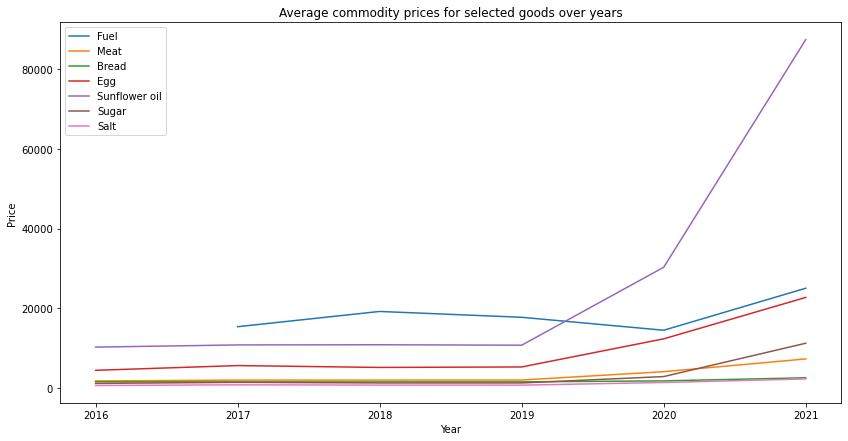

In [37]:
# line plot of yearly commodity prices for selected goods
# matplotlib

plt.figure(figsize=(14, 7)) # creating a figure

# regrouping the data using groupby function, the plotting
fuel.groupby(['year'])['price'].mean().plot(label='Fuel')
meat_b.groupby(['year'])['price'].mean().plot(label='Meat')
bread.groupby(['year'])['price'].mean().plot(label='Bread')
egg.groupby(['year'])['price'].mean().plot(label='Egg')
oil_s.groupby(['year'])['price'].mean().plot(label='Sunflower oil')
sugar.groupby(['year'])['price'].mean().plot(label='Sugar')
salt.groupby(['year'])['price'].mean().plot(label='Salt')

# adding title and labels
plt.title('Average commodity prices for selected goods over years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

# showing the graph
plt.show()

[Text(0.5, 1.0, 'Average commodity prices for selected goods over years')]

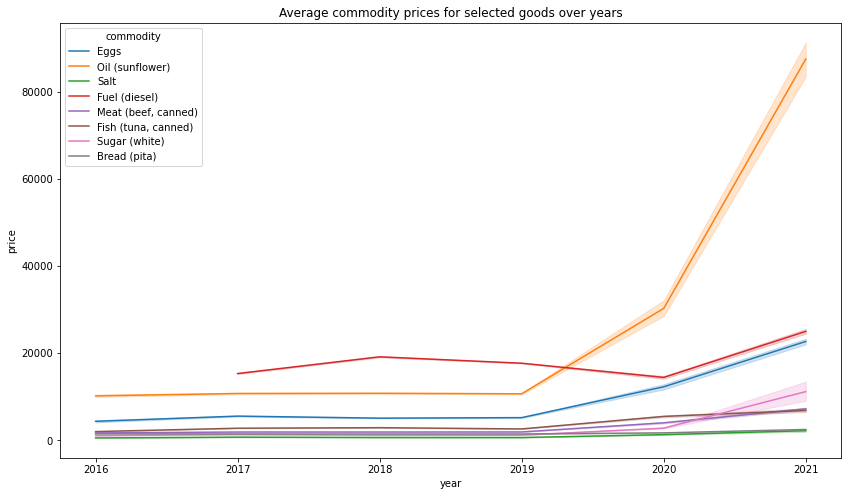

In [38]:
# line plot of yearly commodity prices for selected goods
# seaborn

plt.figure(figsize=(14, 8)) # creating a figure using matplotlib

# year and price per commodity using hue parameter, then set title
sns.lineplot(data=lebanon_selected, x='year', y='price', hue='commodity').set(title= 'Average commodity prices for selected goods over years')

The graph clearly shows shows that food prices in the selected commodities starts to rise up in 2019. The prices of sunflower oil increase the most. Eggs and sugar come after sunflower oil. Salt and bread are the most stable products among the others. The increase in the prices is accelerated particularly after 2020 that must be related to the effects of the pandemic.

We carry on an analysis to see, over the time period, which month seem to have the highest average price for all commodities considered in the data set: 

In [39]:
# on which months did the prices change most

monthly_change = lebanon.groupby(['month'])['price'].mean()
monthly_change.sort_values()


month
6     5475.662557
7     5586.252786
8     5709.923161
9     5886.114363
11    5963.748995
10    6077.206528
12    6219.660381
2     6620.096132
1     6652.769660
3     7014.392187
5     8208.171764
4     9411.251294
Name: price, dtype: float64

In [40]:
monthly_change1 = monthly_change.reset_index()

In [41]:
monthly_change1

,month,price
0,1,6652.769660
1,2,6620.096132
2,3,7014.392187
3,4,9411.251294
4,5,8208.171764
5,6,5475.662557
6,7,5586.252786
7,8,5709.923161
8,9,5886.114363
9,10,6077.206528


In [42]:
# creating months variable to use it in visualization

months = lebanon['month'].unique()
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

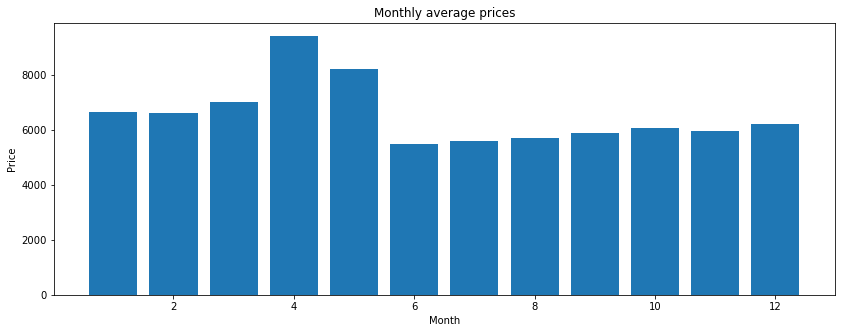

In [43]:
# bar plot of monthly average prices with matplotlib

plt.figure(figsize=(14, 5))
plt.bar(months, monthly_change1['price'])

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly average prices')

plt.show()

<AxesSubplot:xlabel='month', ylabel='price'>

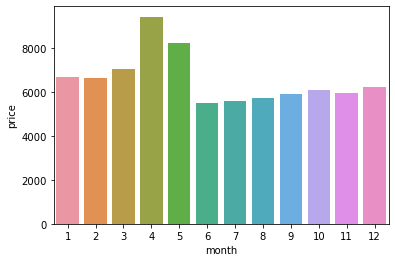

In [44]:
# bar plot of monthly average prices with seaborn

sns.barplot(data = monthly_change1, x = 'month', y = 'price')

It seems like average prices are higher on **April and May** over the time period 2017 - 2021. Also, they tend to be lower on **Summer** compared to Winter. 

Then, we take a look at the average yearly price for each commodity on the 2017 - 2021 time period. Prices are significantly increasing in **2020 and 2021 compared to 2019 and before**, where they were below 20,000 LBP.

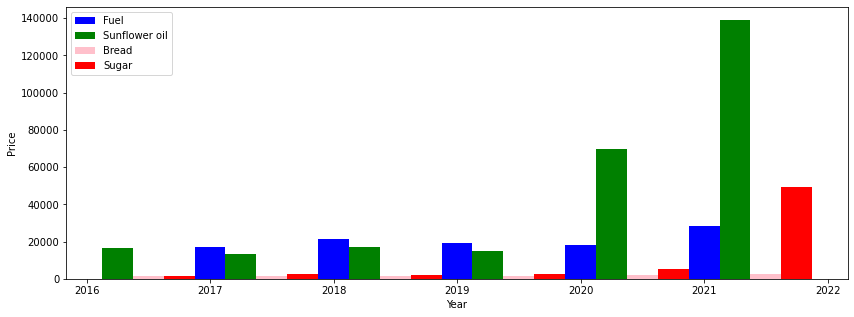

In [45]:
# bar plot of yearly commodity prices for selected goods

plt.figure(figsize=(14, 5))
plt.bar(fuel['year'], fuel['price'], color = 'blue', width = 0.25, label='Fuel')
plt.bar(oil_s['year'] + 0.25, oil_s['price'], color = 'green', width = 0.25, label='Sunflower oil')
plt.bar(bread['year'] + 0.50, bread['price'],  color = 'pink', width = 0.25, label = 'Bread')
plt.bar(sugar['year'] + 0.75, sugar['price'], color='red', width = 0.25, label = 'Sugar')

plt.xlabel('Year')
plt.ylabel('Price')
#plt.title()

plt.legend()

plt.show()

Text(0.5, 1.0, 'Average commodity prices per year for selected goods')

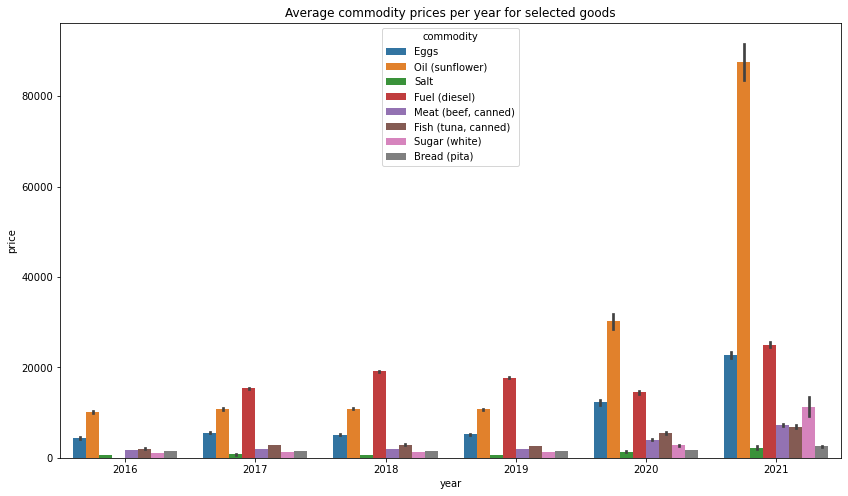

In [46]:
plt.figure(figsize=(14, 8))
sns.barplot(data=lebanon_selected, x = 'year', y = 'price', hue = 'commodity').set_title('Average commodity prices per year for selected goods')

We take a closer look at one of the commodity price evolution throughout 2021: **sugar**. It looks like sugar price has increased once on June 2021 and then reached another threshold on October 2021.

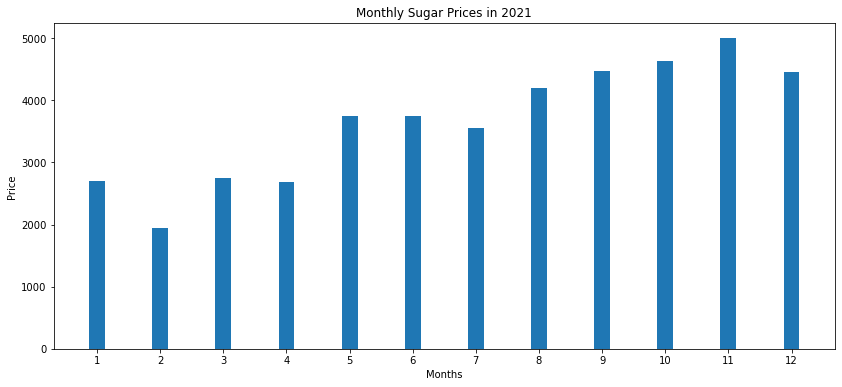

In [47]:
# barplot of monthly sugar price in 2021 to find out when the prices started to went up
# matplotlib

plt.figure(figsize=(14, 6))

plt.bar(sugar[sugar['year'] == 2020]['month'], sugar[sugar['year'] == 2020]['price'], width=0.25)

plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Monthly Sugar Prices in 2021')
plt.xticks(np.arange(1, 13))

plt.show()


<AxesSubplot:xlabel='month', ylabel='price'>

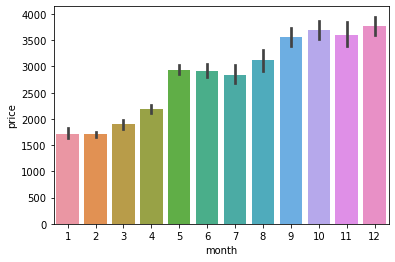

In [48]:
# barplot of monthly sugar price in 2021 to find out when the prices started to went up with seaborn

sns.barplot(x = sugar[sugar['year'] == 2020]['month'], y = sugar[sugar['year'] == 2020]['price'])

We take a closer look at another of the commodity price evolution throughout 2021: **sunflower oil**. It looks like sunflower oil price has increased gradually between February 2021 and May 2021. There is no further data in the data set for 2021.

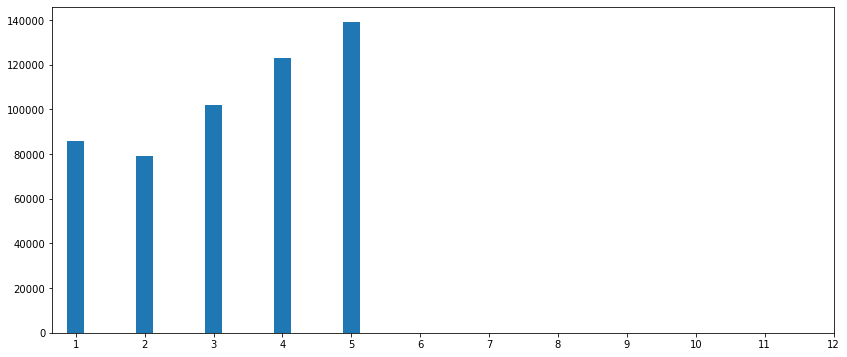

In [49]:
# barplot of monthly sunflower oil price in 2021 to find out when the prices started to went up

plt.figure(figsize=(14, 6))

plt.bar(oil_s[oil_s['year'] == 2021]['month'], oil_s[oil_s['year'] == 2021]['price'], width=0.25)


plt.xticks(np.arange(1, 13))

plt.show()

<AxesSubplot:xlabel='month', ylabel='price'>

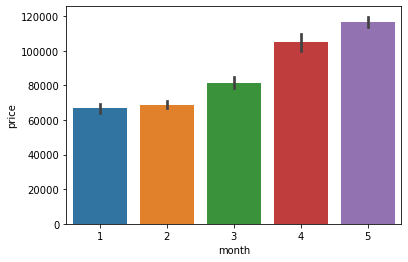

In [50]:
# barplot of monthly sunflower oil price in 2021 to find out when the prices started to went up with seaborn

sns.barplot(x = oil_s[oil_s['year'] == 2021]['month'], y = oil_s[oil_s['year'] == 2021]['price'])

Statistical distribution of food prices of selected goods gives us a general understanding of how data for each commodity is distributed. We can see the central tendency and outliers of the data. For this task, we will use boxplot function of matplotlib and seaborn libraries to get multiple boxplots of the values. To do this plotting, we will first create a new variable called "basket", which would keep the price data of the selected commodities. Then visualize them using the relevant libraries.

In [51]:
# creating a new variable by selection

basket = [fuel['price'], meat_b['price'], bread['price'], egg['price'], sugar['price'], fish['price'], salt['price']]

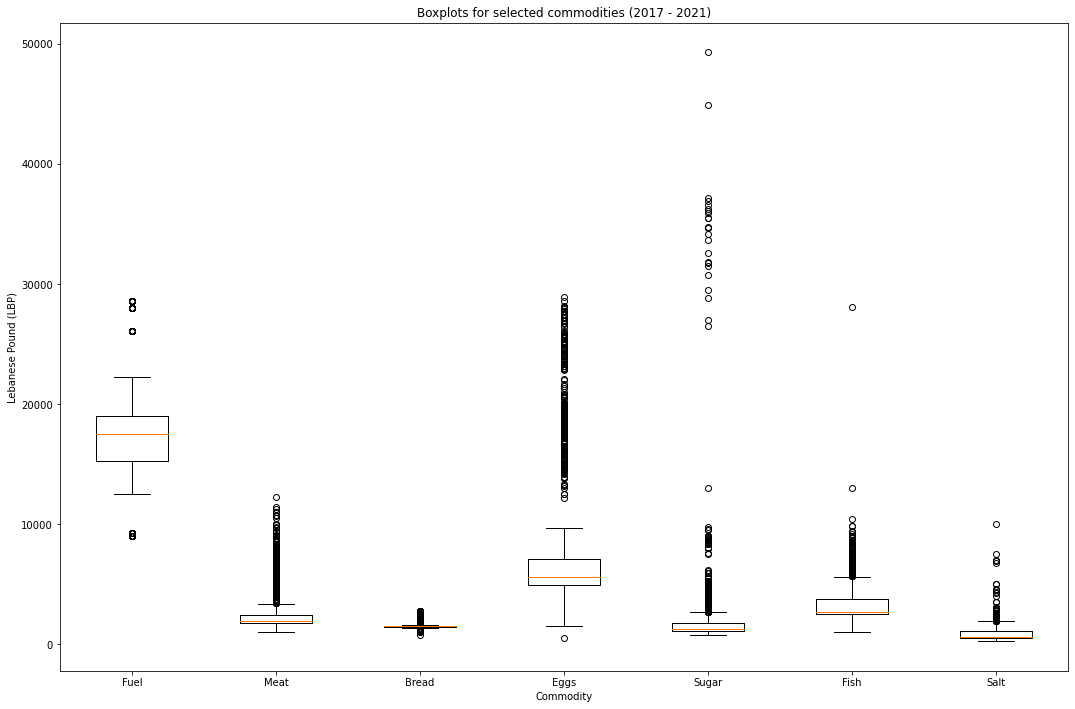

In [52]:
# boxplot with matplotlib for the selected values

labels = ['Fuel', 'Meat', 'Bread', 'Eggs', 'Sugar', 'Fish', 'Salt'] # creating labels for x axis

fig = plt.figure(figsize =(14, 9))
ax = fig.add_axes([0, 0, 1, 1], ylabel='Lebanese Pound (LBP)', xlabel='Commodity', title='Boxplots for selected commodities (2017 - 2021)')
bp = ax.boxplot(basket)
ax.set_xticklabels(labels)
plt.show()

<AxesSubplot:xlabel='commodity', ylabel='price'>

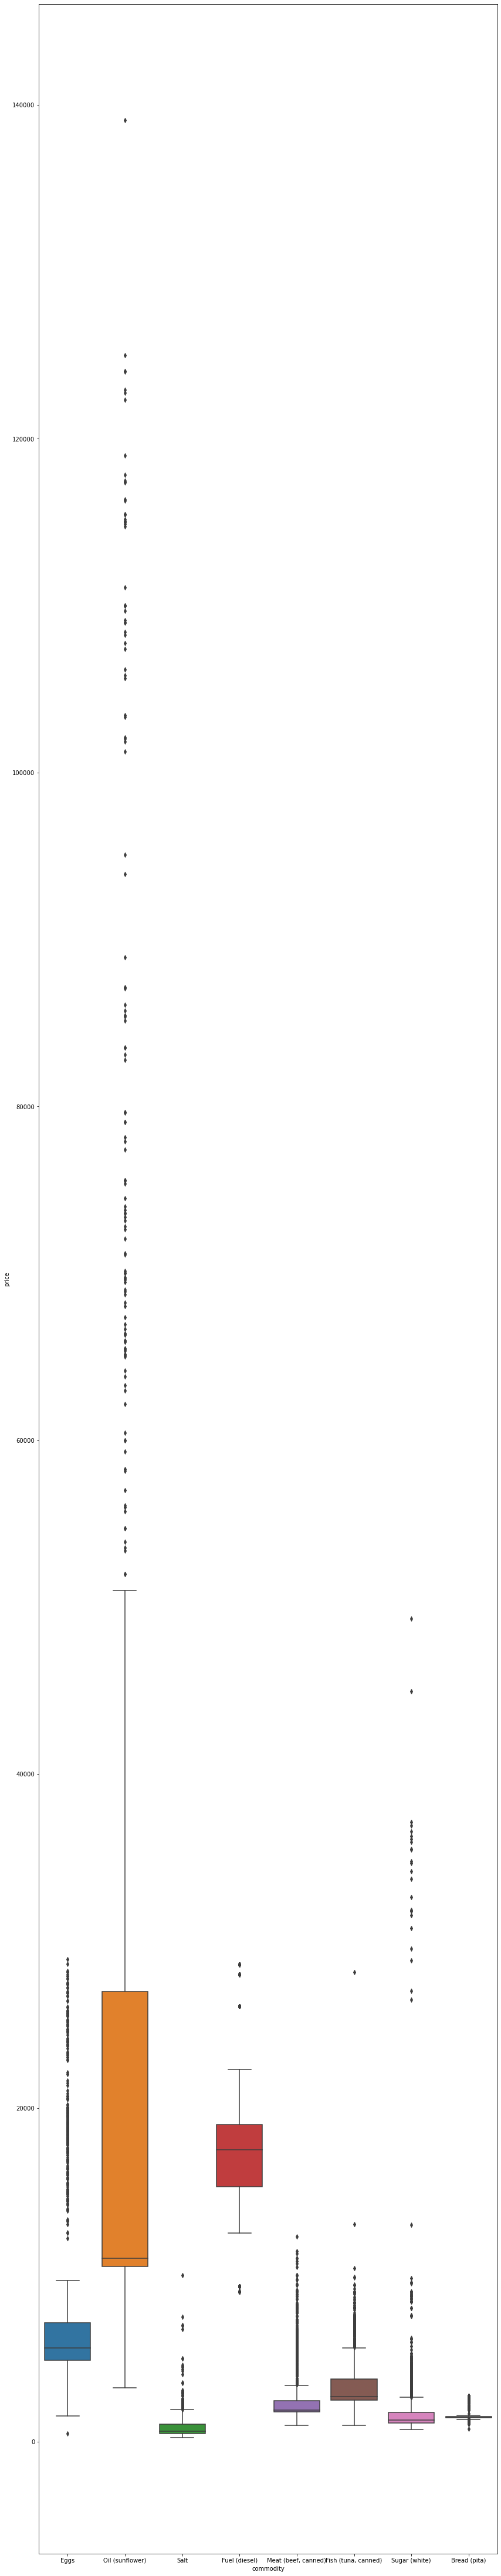

In [53]:
# boxplots with seaborn

plt.figure(figsize=(14, 80))
sns.boxplot(x = lebanon_selected['commodity'], y = lebanon_selected['price'])

Egg, sunflower oil and sugar were the commodities whose prices increased the most. The boxplots show us these two good have also plenty of outlier values. In other words, the outliers must be the main reason in the jumps in their prices. Other than them, the other goods also have many outlier values, which is why the food prices are that unstable.

One interesting finding in the boxplots is that the median values for each commodity is closer to first quartile. This supports the idea that price increases are led by the outlier values, which might have become abundant after the year 2019. Thus, Lebanon had more stable food prices until 2019.

We will now look at a different aspect of food prices which is food price-city relationship. We want to findout which are the most expensive and cheapest cities in terms of food prices. To do that, we will first create city_price variable, which stores the average food prices per cities usign groupby function and sorting, then visualize it using bar plot.

In [54]:
# which cities are the most expensive and the cheapest to live

# averege food prices per city
city_price = lebanon.groupby(['city'])['price'].mean()

# sorting descending
city_price.sort_values(ascending=False)

city
Jezzine           8097.450273
Bechare           8034.878647
Bint Jbeil        7406.115488
Marjayoun         7190.427653
Hasbaya           7179.540689
Hermel            7082.186036
Jbeil             7078.771916
Zgharta           7038.998124
Nabatiyeh         6811.529408
Zahle             6758.260165
Keserwan          6676.848724
West Beqaa        6625.282171
Baabda            6594.198925
Sour              6577.121434
El Metn           6468.824799
Batroun           6453.839017
Beirut            6450.079735
Tripoli           6429.956237
Koura             6424.592404
Aley              6421.347587
Minieh-Dannieh    6365.682152
Saida             6356.475426
Chouf             6337.294972
Rashaya           6309.190807
Akkar             6086.595068
Baalbeck          5969.737218
Name: price, dtype: float64

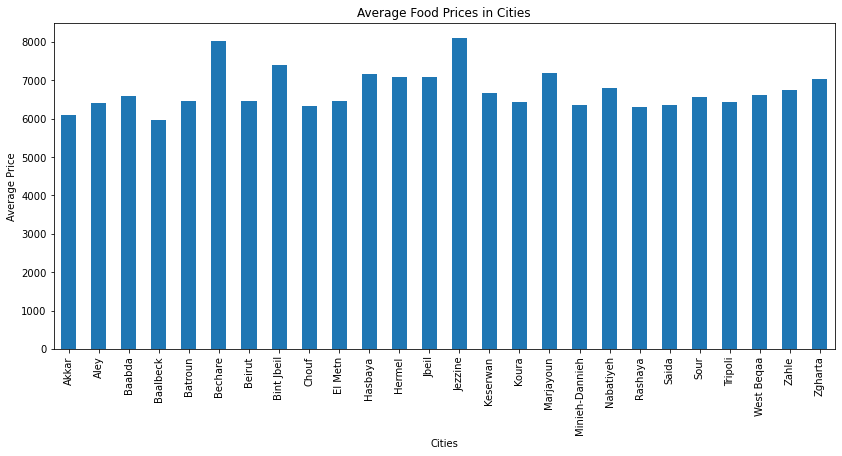

In [55]:
# visualization of average food prices per city
# matplotlib

plt.figure(figsize=(14, 6))
city_price.plot.bar() # barplot

# adding labels
plt.xlabel('Cities')
plt.ylabel('Average Price')
plt.title('Average Food Prices in Cities')

plt.show()

Since matplotlib and seaborn work in different inputs, we need to rearrange the city_price variable. We will turn it into a dataframe using reset_index() method and save it into a new variable, then use it in seaborn function for bar plot.

In [56]:
# reset index
city_price1 = city_price.reset_index()

# checking if it works
city_price1

,city,price
0,Akkar,6086.595068
1,Aley,6421.347587
2,Baabda,6594.198925
3,Baalbeck,5969.737218
4,Batroun,6453.839017
5,Bechare,8034.878647
6,Beirut,6450.079735
7,Bint Jbeil,7406.115488
8,Chouf,6337.294972
9,El Metn,6468.824799


<AxesSubplot:xlabel='city', ylabel='price'>

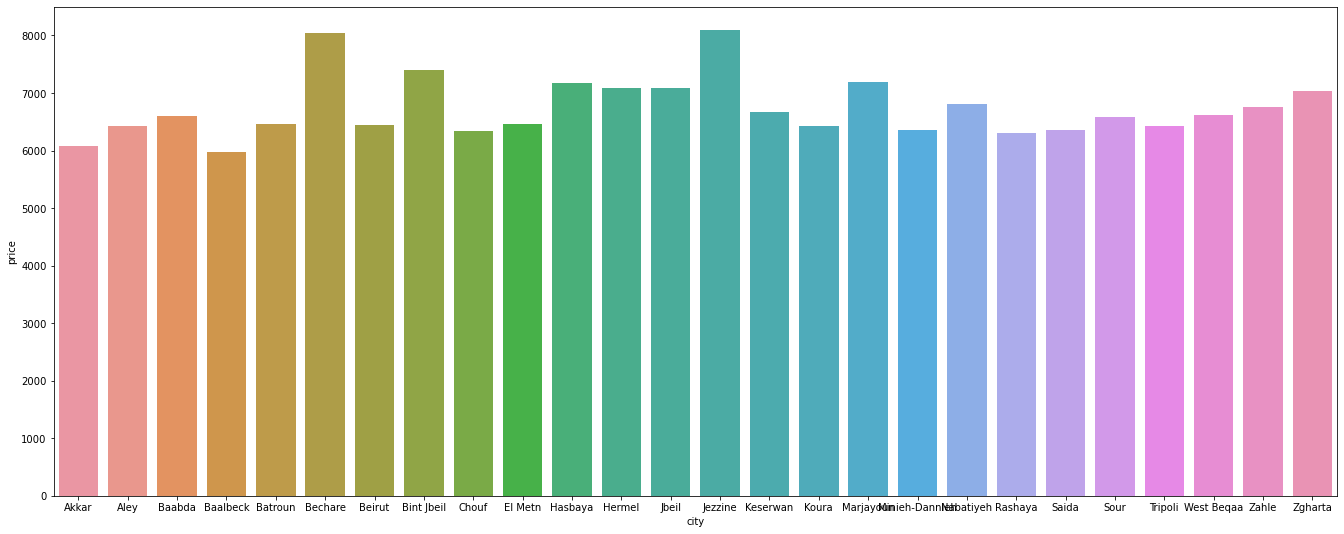

In [57]:
# bar plot with seaborn

plt.figure(figsize=(23, 9))

sns.barplot(data = city_price1, x = 'city', y = 'price')

As the plots shows, the cheapest city is **Baalbeck**, while the most expensive cities are **Jezzine and Bechare**. Baalbeck with ~6000 LBP in average is about 25% cheaper in terms of food prices than Jezzine and Bechare with ~8000 LBP in average, which is a serious difference.

Finally, we want to look if there is any **correlation between the prices of fuel and sunflower oil**. The reason why we choose these two are is twofold: first, oil is the commodity which can influence price movements of other commodities. Second, sunflower oil is the commodity where we see the most obvious price increase.

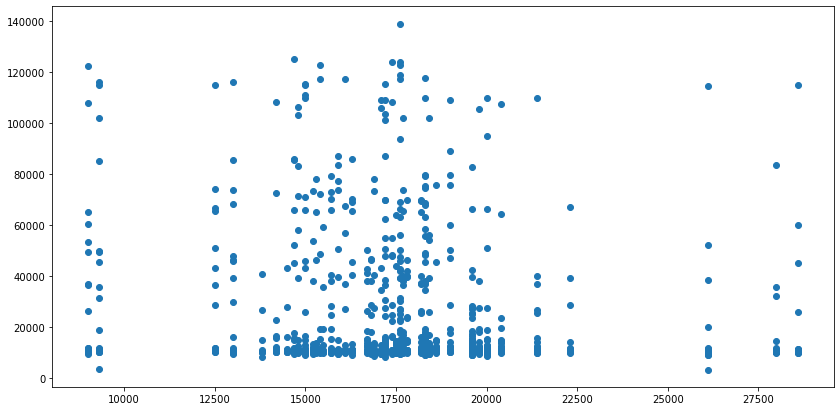

In [58]:
# does fuel prices affect the prices of sunflower oil
# matplotlib

plt.figure(figsize=(14, 7))

#since the lengths of prices are not equal, we will take fuel price till 930th value, which is the maximum for sunflower oil price.
plt.scatter(fuel['price'][:930], oil_s['price'])

We do not see a clear association between fuel prices and sunflower oil prices. The price increase in sunflower oil must be originated from some external factors such as drought in 2020 that impacted sunflower agriculture. Also, it is important to have in mind that Lebanon is a country that heavily relies on other countries for importation for many commodities. Thus, externalities on the global sunflower market can impact prices in Lebanon.

## Step 4: Inference

Lebanon relies heavily on gasoline  and agricultural goods including wheat, sugar, bulgur, white beans, black lentil, salt, sunflower oil, vegetable ghee, tea, tomato paste, and chickpeas. From our exploratory data analysis on the most basic commodities demonstrates the prices of many essential consumer products have been increasing significantly, more than 1000% in fuel and average 400% in agricultural products of its initial price.<br>
More specifically, our analysis provides some insights to the following questions issues regarding food prices:

Text(0.5, 1.0, 'Average commodity prices for selected goods over years')

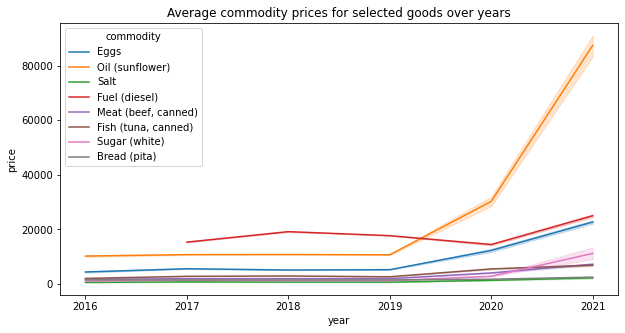

In [59]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=lebanon_selected, x='year', y='price', hue='commodity')

plt.title('Average commodity prices for selected goods over years')

**Yearly Change:** Food prices start to increase especially from the mid 2020. Particularly, there are dramatic increases for sugar, sunflower oil and fuel prices. Although we initially thought that the increase in fuel prices led to this spike, we did not see an association between the prices of these products. Therefore, the main reason for the yearly spike must be the disruption of the supply-demand balance caused by the pandemic.

Text(0.5, 1.0, 'Bread prices range')

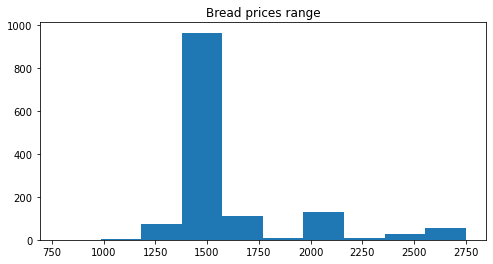

In [60]:
plt.figure(figsize=(8, 4))
plt.hist(bread['price'])

plt.title('Bread prices range')

**Most steady and unsteady commodity:** While bread and salt were the products with the most stable prices, sunflower oil, sugar and egg are the products whose price increased the most. Especially the prices of sunflower oil has increased hugely compared to others. Apart from the pandemic, we think that the reason for this is the negative impact of the seasonal drought on sunflower agriculture that took place in 2020-2021. However, although these products are the most stable in price, they also show significant changes sometimes.<br>

<AxesSubplot:xlabel='city', ylabel='price'>

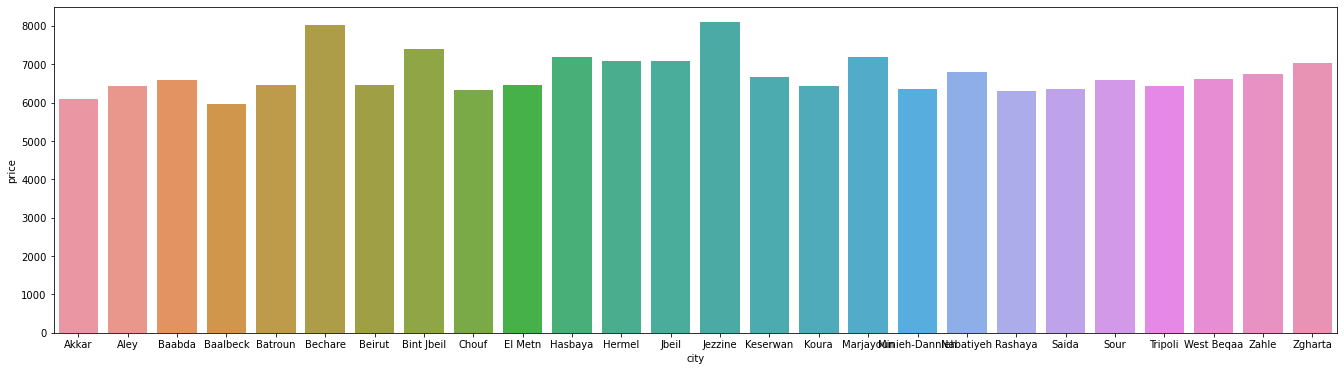

In [61]:
# cities in food prices
plt.figure(figsize=(23, 6))

sns.barplot(data = city_price1, x = 'city', y = 'price')

**The Cheapes and the most expensive cities:** In terms of average food prices, the cheapest city is Baalbeck, while the most expensive cities are Jezzine and Bechare. Baalbeck is about 25% cheaper in terms of food prices than Jezzine and Bechare.

<AxesSubplot:xlabel='month', ylabel='price'>

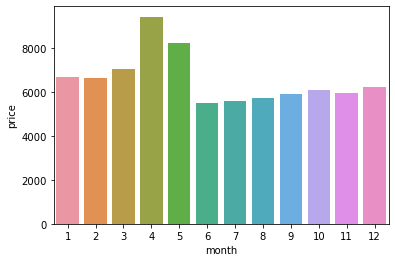

In [62]:
# monthly average prices
sns.barplot(data = monthly_change1, x = 'month', y = 'price')

**Monthly price changes:** Average food price on monthly basis peaks in April. Prices are high in May as well. Additionally, prices are higher in autumn and winter comparing spring and summer. However, prices, which started to decline rapidly in June, remained stable until December.

## Step 5: Conclusion

Lebanon faces one of the top three most severe economic collapses while staple food and fuel prices continue to rise. According to our analysis from the Lebanon dataset, the result presents that the typical prices of essential commodity products has changed brutally over the time period. <br> Rising prices is a global tendancy but some commodities are more impacted than others (fuel, sunflower oil, sugar). Also, some cities from the North and South of Lebanon (Jezzine, Bechare, Bint Jbeil) seem to have higher average prices than in the capital city: Beirut. <br> The seasonal factor and geographic location have actually very little correlation in the price changes crisis. While  the Covid-19 Pandemic probably hold a responsibility in this phenomenon, systemic corruption is likely to be a catalyst for the price increases in Lebanon. All these phenomena have resulted in population facing food shortage.


## _References_

1. Barua, Akrur. Deloitte Insights.https://www2.deloitte.com/xe/en/insights/economy/global-food-prices-inflation.html.May 31, 2022
2. Rahman, Fareed.https://www.thenationalnews.com/business/economy/2022/08/04/lebanon-is-the-worlds-worst-hit-by-food-inflation-crisis-world-bank-says/.August 04, 2022
3. Rans, Michael.the dataset Global Food Prices Database (WFP).https://data.humdata.org/dataset/wfp-food-prices. August 22, 2021